In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

/tmp/ipykernel_7500/2266798505.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(["0°","30°", "60°", "90°", "120°", "150°", "180°"], fontsize=11)


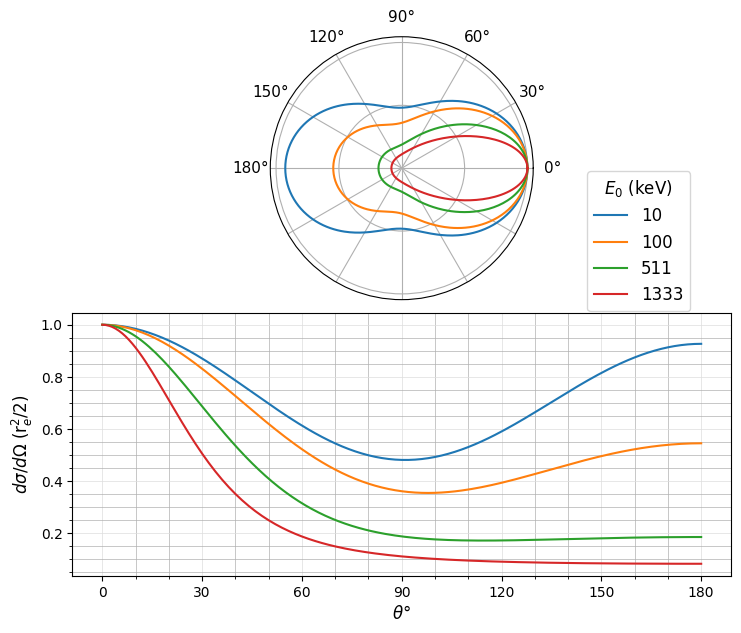

In [58]:
mc2 = 510.99895 #m*c**2 in keV
npuntos = 361

def f(E, t):
    e = E/mc2
    top = 1 + np.cos(t)**2 + (e*e*(1-np.cos(t))**2)/(1+e*(1-np.cos(t)))
    bot = (1+e*(1-np.cos(t)))**2  
    return top/(2*bot)

E = [10, 100, 511, 1333]
theta = np.linspace(0, 2*np.pi,num=npuntos)
y = np.zeros((len(E),npuntos))

for ii in range(len(E)):
    for jj in range(npuntos):
        y[ii][jj] = f(E[ii], theta[jj])
                
        
fig = plt.figure(figsize=(8.5,7)) 
ax0 = fig.add_subplot(211, projection='polar')
ax1 = fig.add_subplot(212)
fig.subplots_adjust(hspace=0.05)


## Gráfica polar
for ii in range (len(E)):
    ax0.plot(theta, y[ii])

ax0.set_xticklabels(["0°","30°", "60°", "90°", "120°", "150°", "180°"], fontsize=11)
ax0.set_yticklabels(())
ax0.set_xticks(np.arange(0, 2*np.pi, np.pi/6))
ax0.set_yticks((0,0.5,1))


## Gráfica cartesiana
for ii in range(len(E)):
    ax1.plot(np.degrees(theta)[:int(npuntos/2)+1:] ,y[ii][:int(npuntos/2)+1:], label=E[ii])
    ax1.set_xlabel(r"$\theta°$", fontsize=12)
    ax1.set_ylabel(r"$d \sigma / d \Omega$ (r$^2_e/2$)", fontsize=12)
    ax1.grid(which='major', color='#DDDDDD', linewidth=0.5)
    ax1.minorticks_on()
    ax1.set_xticks(np.arange(0,210,30), fontisize=11)
    ax1.grid(True, which='both', linewidth=0.5)
    ax1.xaxis.set_minor_locator(MultipleLocator(10))
    
plt.legend(title=r"$E_0$ (keV)", bbox_to_anchor=(0.95, 1.57), fontsize=12, title_fontsize=12)
plt.savefig("polar+cartesian.pdf")

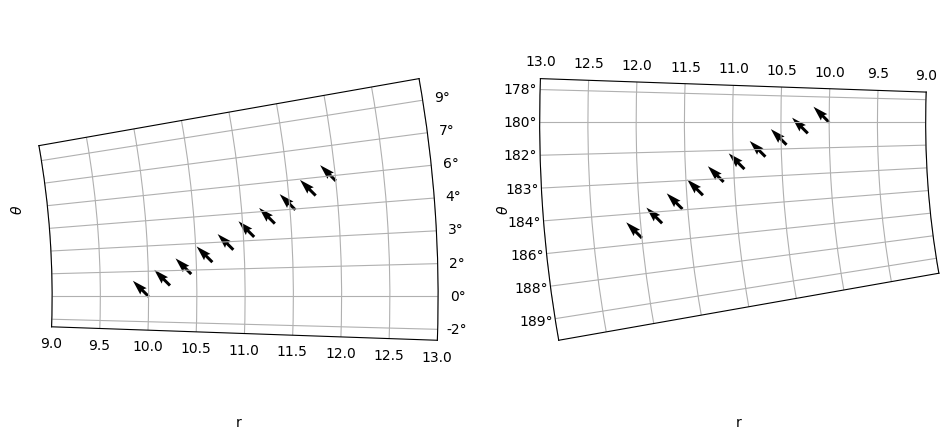

In [8]:
fig = plt.figure(figsize=[10, 5])
ax0 = fig.add_axes([0.05, 0.05, 0.4, 0.9], projection="polar")
ax1 = fig.add_axes([0.55, 0.05, 0.4, 0.9], projection="polar")

r0 = np.linspace(10, 12, 10)
theta0 = np.linspace(0, 0.1, 10)

ax0.quiver(theta0, r0, -0.1, 0.1)
ax1.quiver(theta0 + np.pi, r0, -0.1, 0.1)

ax0.set_thetamin(-2)
ax0.set_thetamax(10)

ax1.set_thetamin(178)
ax1.set_thetamax(190)

for ax in [ax0, ax1]:

    # Labels
    ax.set_xlabel("r")
    ax.set_ylabel(r"$\theta$", labelpad=10)

    # R range
    ax.set_rorigin(0)
    ax.set_rmin(9)
    ax.set_rmax(13)

plt.show()